## Import Required Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("LINEAR REGRESSION MODEL - ELECTRIC VEHICLE DATA")
print("="*60)

LINEAR REGRESSION MODEL - ELECTRIC VEHICLE DATA


## Load and Explore the Data

In [ ]:
df = pd.read_excel('ev_new.xlsx')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (257038, 15)

Column names:
['County', 'Latitude', 'Longitude', 'Year', 'Make', 'Model', 'Vehicle Type', 'CAFV Eligibility', 'Year_Make_Model', 'POP_2025', 'Median Income', 'MSRP', 'Dest. Charge', 'Tax Credit', 'Electric Range']


,County,Latitude,Longitude,Year,Make,Model,Vehicle Type,CAFV Eligibility,Year_Make_Model,POP_2025,Median Income,MSRP,Dest. Charge,Tax Credit,Electric Range
0,yakima,46.60464,-120.50729,2024,TESLA,MODEL 3,BEV,Eligible,2024 TESLA MODEL 3,264650,76662,44865,1515,5625,306
1,king,47.53010,-122.03439,2021,AUDI,E-TRON,BEV,Eligible,2021 AUDI E-TRON,2411700,154490,65900,1095,7500,222
2,snohomish,47.89908,-122.29196,2020,JAGUAR,I-PACE,BEV,Eligible,2020 JAGUAR I-PACE,873800,127475,69850,1025,7500,234
3,yakima,46.59751,-120.52041,2024,HYUNDAI,IONIQ 5,BEV,Eligible,2024 HYUNDAI IONIQ 5,264650,76662,50093,1386,0,272
4,snohomish,47.80310,-122.18384,2021,TESLA,MODEL Y,BEV,Eligible,2021 TESLA MODEL Y,873800,127475,54657,1200,0,318


## Prepare Features and Target Variable

In [67]:
numeric_features = ['Year', 'MSRP']
categorical_features = ['Make', 'Vehicle Type']

X = df[numeric_features + categorical_features]
y = df['Electric Range']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nTarget variable (Electric Range):")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Min: {y.min():.2f}")
print(f"  Max: {y.max():.2f}")

Feature matrix shape: (257038, 4)
Target variable shape: (257038,)

Target variable (Electric Range):
  Mean: 213.45
  Std: 110.28
  Min: 1.00
  Max: 492.00


## Split Data and Build Pipeline

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\nPipeline created successfully!")

Training set size: 205630
Test set size: 51408

Pipeline created successfully!


## Train Linear Regression Model

In [69]:
print("Training Linear Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Model trained successfully!")

y_train_pred = lr_pipeline.predict(X_train)
y_test_pred = lr_pipeline.predict(X_test)

print(f"\nPredictions generated for {len(y_test_pred)} test samples")

Training Linear Regression model...
Model trained successfully!
Model trained successfully!

Predictions generated for 51408 test samples

Predictions generated for 51408 test samples


## Evaluate Model Performance

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n" + "="*60)
print("TEST SET PERFORMANCE METRICS")
print("="*60)

print(f"\nTest Set Results:")
print("-" * 50)
print(f"{'Metric':<20} {'Train':<15} {'Test':<15}")
print("-" * 50)
print(f"{'R² Score':<20} {train_r2:<15.4f} {test_r2:<15.4f}")
print(f"{'RMSE (miles)':<20} {train_rmse:<15.4f} {test_rmse:<15.4f}")
print(f"{'MAE (miles)':<20} {train_mae:<15.4f} {test_mae:<15.4f}")
print(f"{'MSE':<20} {train_mse:<15.4f} {test_mse:<15.4f}")


TEST SET RESULTS OF LINEAR REGRESSION ON EV DATA

Table 2
--------------------------------------------------
Metric               R² Score        RMSE            MAE             MSE            
--------------------------------------------------
Mean                 0.8980          35.2193         26.0079         1240.3980      
STD Dev              0.0032          0.4550          0.2572          29.0638        


## Cross-Validation Analysis

In [71]:
print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
    X_fold_train = X_train.iloc[train_idx]
    X_fold_val = X_train.iloc[val_idx]
    y_fold_train = y_train.iloc[train_idx]
    y_fold_val = y_train.iloc[val_idx]
    
    fold_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    fold_pipeline.fit(X_fold_train, y_fold_train)
    
    y_fold_val_pred = fold_pipeline.predict(X_fold_val)
    
    fold_r2 = r2_score(y_fold_val, y_fold_val_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_fold_val, y_fold_val_pred))
    fold_mae = mean_absolute_error(y_fold_val, y_fold_val_pred)
    fold_mape = mean_absolute_percentage_error(y_fold_val, y_fold_val_pred)
    fold_mse = mean_squared_error(y_fold_val, y_fold_val_pred)
    
    fold_results.append({
        'Fold': fold_idx,
        'R² Score': fold_r2,
        'RMSE': fold_rmse,
        'MAE': fold_mae,
        'MAPE': fold_mape,
        'MSE': fold_mse,
        'Support': len(y_fold_val)
    })

fold_df = pd.DataFrame(fold_results)

print("\n" + "="*60)
print("CROSS-VALIDATION: DETAILED BREAKDOWN - ALL 5 FOLDS")
print("="*60)

for idx, row in fold_df.iterrows():
    fold_num = int(row['Fold'])
    print(f"\n{fold_num}({chr(96+fold_num)})")
    print(f"Cross Validation: Fold {fold_num}")
    print("-" * 45)
    print(f"{'Metric':<15} {'Value':<12}")
    print("-" * 45)
    print(f"{'R² Score':<15} {row['R² Score']:<12.4f}")
    print(f"{'RMSE':<15} {row['RMSE']:<12.4f}")
    print(f"{'MAE':<15} {row['MAE']:<12.4f}")
    print(f"{'MSE':<15} {row['MSE']:<12.4f}")
    print(f"{'Support':<15} {int(row['Support']):<12,}")


CROSS-VALIDATION RESULTS (5-Fold)

CROSS-VALIDATION: DETAILED BREAKDOWN - ALL 5 FOLDS

1(a)
Cross Validation: Fold 1
---------------------------------------------
Metric          Value       
---------------------------------------------
R² Score        0.8955      
RMSE            35.5948     
MAE             26.0613     
MSE             1266.9898   
Support         41,126      

2(b)
Cross Validation: Fold 2
---------------------------------------------
Metric          Value       
---------------------------------------------
R² Score        0.8953      
RMSE            35.6228     
MAE             26.1126     
MSE             1268.9826   
Support         41,126      

3(c)
Cross Validation: Fold 3
---------------------------------------------
Metric          Value       
---------------------------------------------
R² Score        0.8984      
RMSE            35.2379     
MAE             26.0702     
MSE             1241.7123   
Support         41,126      

4(d)
Cross Validation

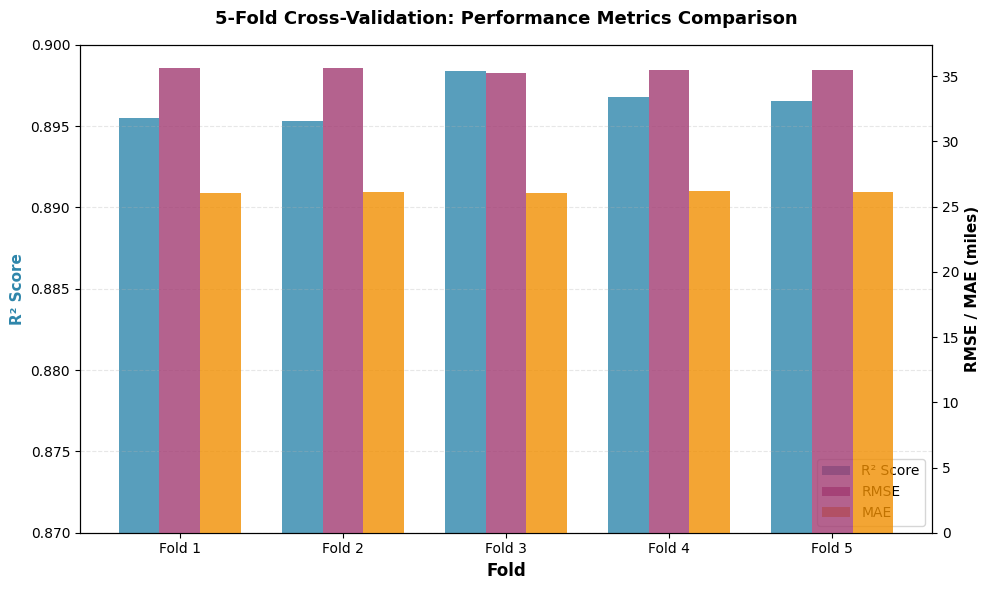

✓ Fold Metrics Comparison: fold_metrics_comparison.png saved successfully


In [72]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(10, 6))

folds = fold_df['Fold'].values
r2_scores = fold_df['R² Score'].values
rmse_values = fold_df['RMSE'].values
mae_values = fold_df['MAE'].values

x = np.arange(len(folds))
width = 0.25

bars1 = ax1.bar(x - width, r2_scores, width, label='R² Score', color='#2E86AB', alpha=0.8)
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x, rmse_values, width, label='RMSE', color='#A23B72', alpha=0.8)
bars3 = ax1_twin.bar(x + width, mae_values, width, label='MAE', color='#F18F01', alpha=0.8)

ax1.set_xlabel('Fold', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=11, fontweight='bold', color='#2E86AB')
ax1_twin.set_ylabel('RMSE / MAE (miles)', fontsize=11, fontweight='bold')
ax1.set_title('5-Fold Cross-Validation: Performance Metrics Comparison', fontsize=13, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels([f'Fold {int(f)}' for f in folds])
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim([0.87, 0.90])

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right', frameon=True, fontsize=10)

plt.tight_layout()
plt.savefig('fold_metrics_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Fold Metrics Comparison: fold_metrics_comparison.png saved successfully")


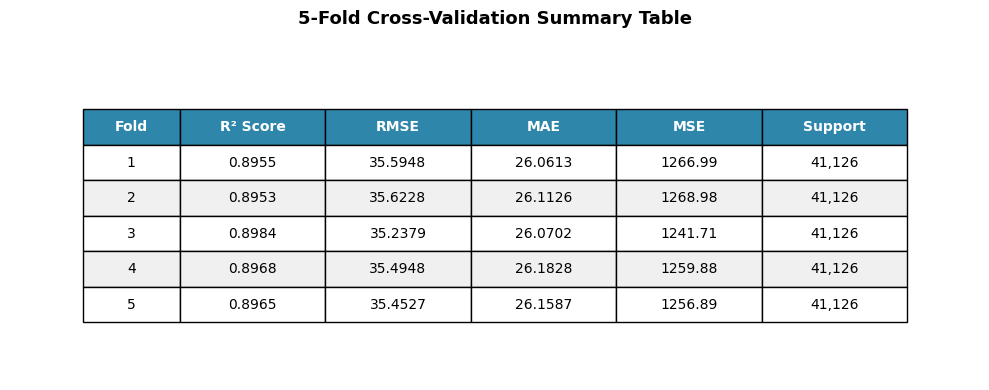

✓ Fold Summary Table: fold_summary_table.png saved successfully


In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

table_data = []
table_data.append(['Fold', 'R² Score', 'RMSE', 'MAE', 'MSE', 'Support'])
for idx, row in fold_df.iterrows():
    table_data.append([
        f"{int(row['Fold'])}",
        f"{row['R² Score']:.4f}",
        f"{row['RMSE']:.4f}",
        f"{row['MAE']:.4f}",
        f"{row['MSE']:.2f}",
        f"{int(row['Support']):,}"
    ])

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.1, 0.15, 0.15, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

for i in range(len(table_data[0])):
    table[(0, i)].set_facecolor('#2E86AB')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(table_data)):
    for j in range(len(table_data[0])):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#F0F0F0')
        else:
            table[(i, j)].set_facecolor('white')

ax.set_title('5-Fold Cross-Validation Summary Table', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('fold_summary_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Fold Summary Table: fold_summary_table.png saved successfully")

## Baseline Comparison

In [74]:
print("\n" + "="*60)
print("BASELINE COMPARISON")
print("="*60)

baseline_pred_train = np.full_like(y_train, y_train.mean(), dtype=float)
baseline_pred_test = np.full_like(y_test, y_train.mean(), dtype=float)

baseline_r2_train = r2_score(y_train, baseline_pred_train)
baseline_r2_test = r2_score(y_test, baseline_pred_test)
baseline_rmse_test = np.sqrt(mean_squared_error(y_test, baseline_pred_test))

print(f"\nBaseline (Mean Predictor):")
print(f"  Train R²: {baseline_r2_train:.4f}")
print(f"  Test R²: {baseline_r2_test:.4f}")
print(f"  Test RMSE: {baseline_rmse_test:.4f}")

print(f"\nLinear Regression Improvement:")
print(f"  R² Improvement: {test_r2 - baseline_r2_test:.4f}")
print(f"  RMSE Reduction: {baseline_rmse_test - test_rmse:.4f}")


BASELINE COMPARISON

Baseline (Mean Predictor):
  Train R²: 0.0000
  Test R²: -0.0000
  Test RMSE: 110.2561

Linear Regression Improvement:
  R² Improvement: 0.8980
  RMSE Reduction: 75.0368


## Model Diagnostics and Visualizations

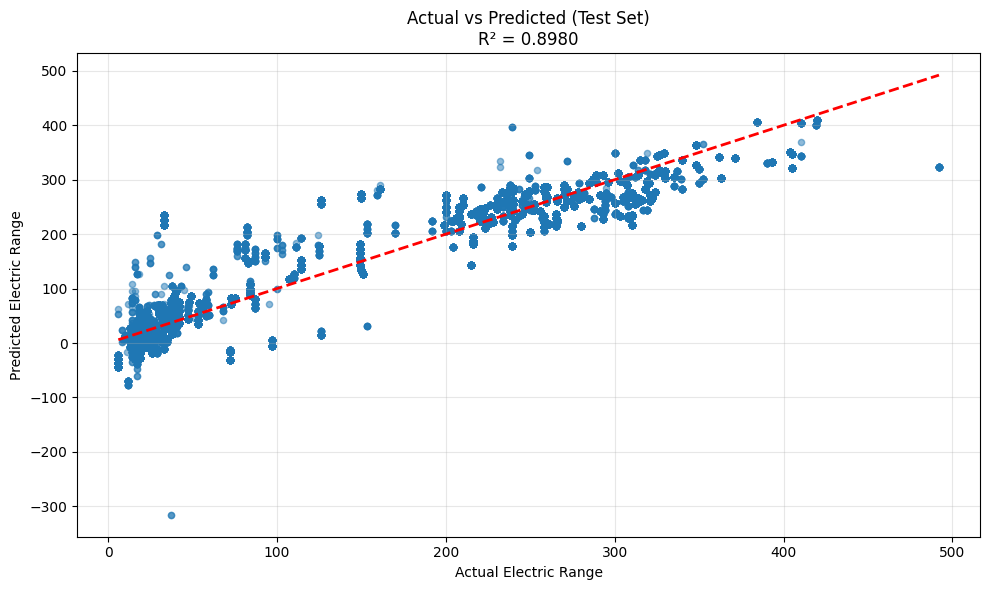

✓ Chart 1: Actual vs Predicted


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test, y_test_pred, alpha=0.5, s=20, color='steelblue', edgecolor='navy', linewidth=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Electric Range (miles)', fontsize=11)
ax.set_ylabel('Predicted Electric Range (miles)', fontsize=11)
ax.set_title(f'Actual vs Predicted Values (Test Set)\nR² Score: {test_r2:.4f}', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

print("✓ Actual vs Predicted Scatter Plot")

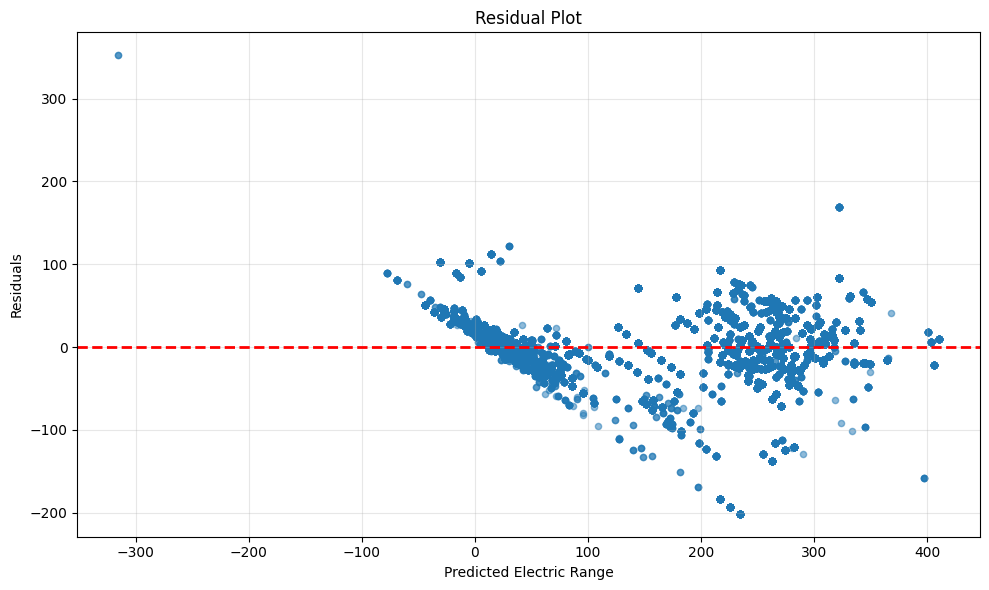

✓ Chart 2: Residual Plot


In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
residuals = y_test - y_test_pred
ax.scatter(y_test_pred, residuals, alpha=0.5, s=20, color='steelblue', edgecolor='navy', linewidth=0.5)
ax.axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
ax.set_xlabel('Predicted Electric Range (miles)', fontsize=11)
ax.set_ylabel('Residuals (miles)', fontsize=11)
ax.set_title('Residual Plot: Model Error Analysis', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

print("✓ Residual Plot")

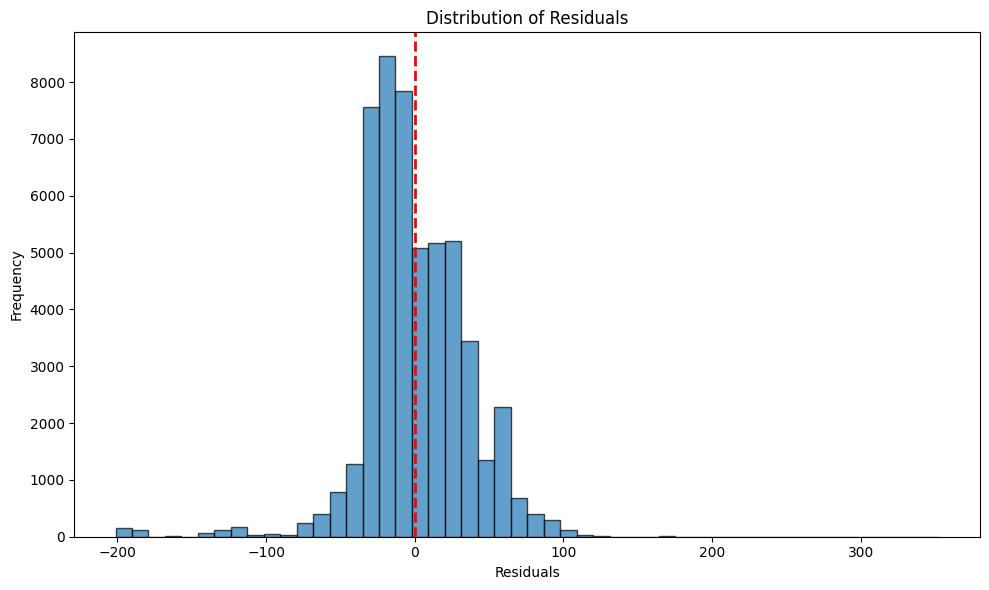

✓ Chart 3: Residual Distribution


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
ax.set_xlabel('Residuals (miles)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Distribution of Prediction Errors', fontsize=12, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

print("✓ Residual Distribution Histogram")

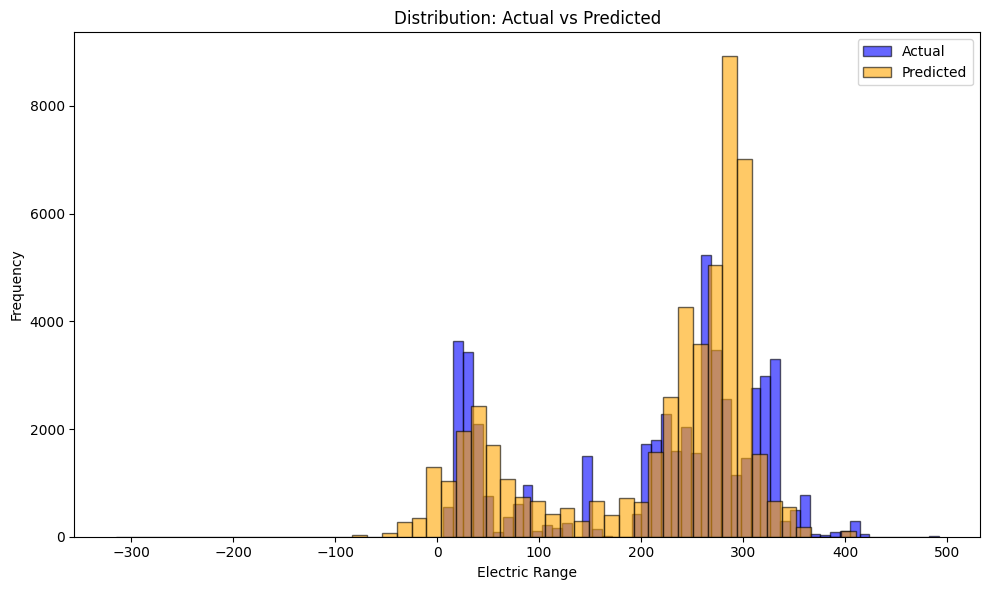

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(y_test, bins=50, alpha=0.6, label='Actual', color='steelblue', edgecolor='black')
ax.hist(y_test_pred, bins=50, alpha=0.6, label='Predicted', color='coral', edgecolor='black')
ax.set_xlabel('Electric Range (miles)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Distribution Comparison: Actual vs Predicted Values', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("✓ Distribution Comparison")



## Geographic Analysis - EV Locations Map

In [ ]:
import subprocess
import sys

packages = ['geopandas', 'shapely']
for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        print(f"✓ {package} installed successfully")

import geopandas as gpd
from shapely.geometry import Point
print("\n✓ All geographic libraries loaded successfully")

✓ geopandas already installed
✓ shapely already installed

✓ All geographic libraries loaded successfully


Note: Could not load state boundary: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


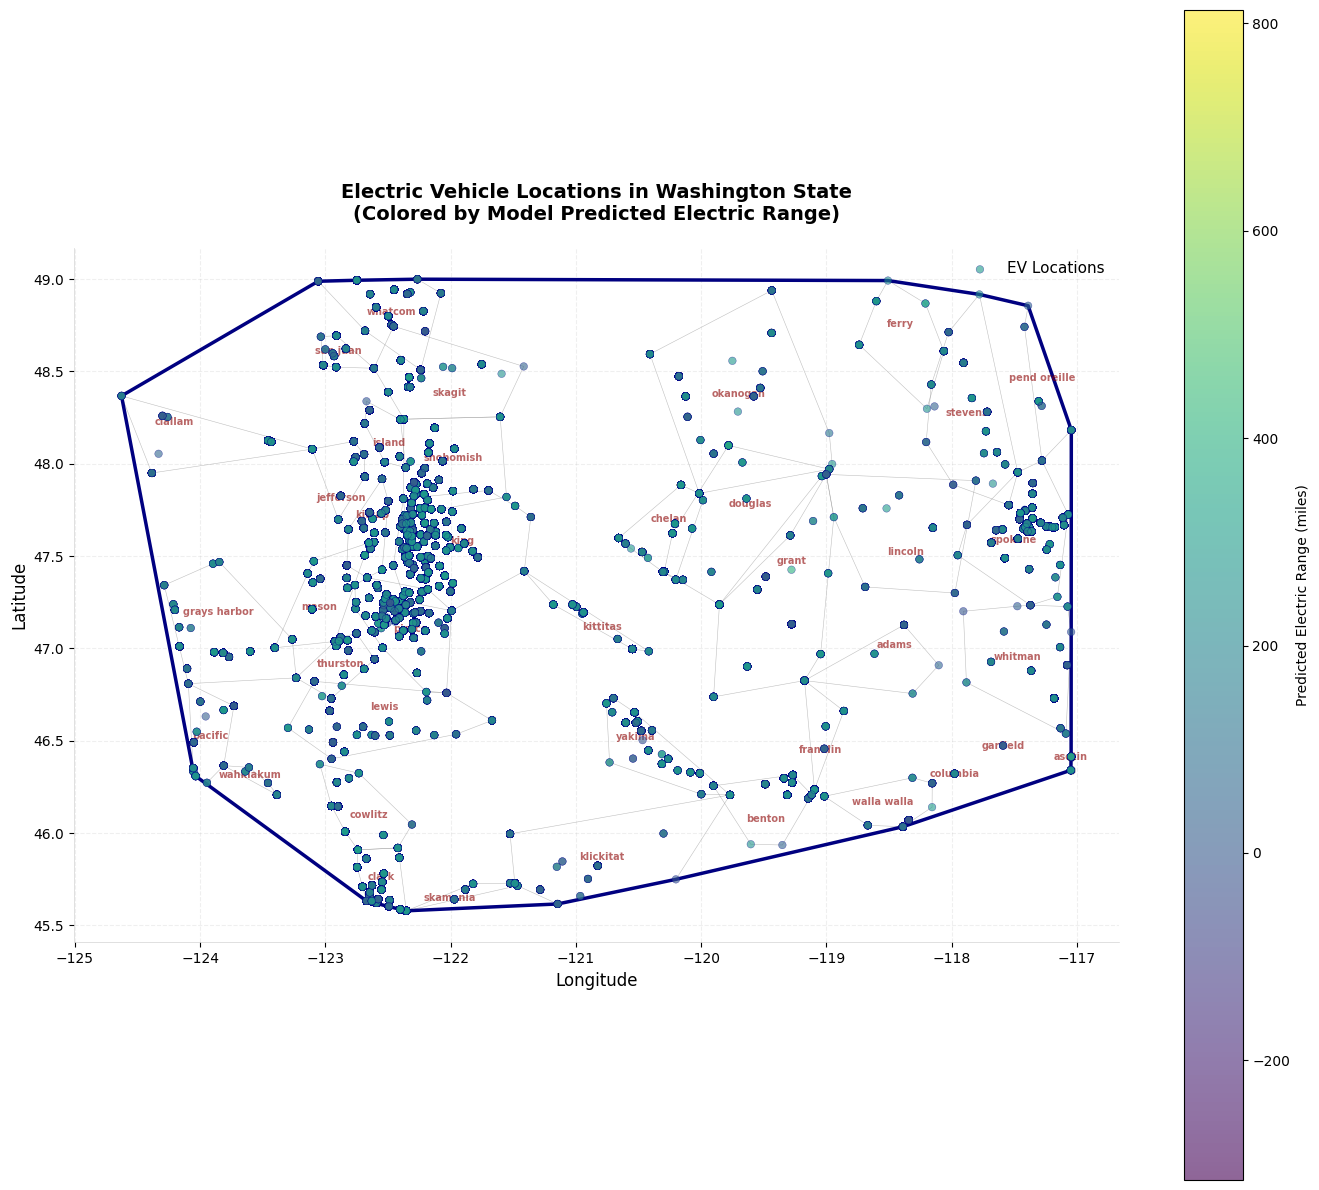

✓ Chart 5: Geographic Map - EV Locations in Washington State


In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))

if 'gdf_ev' not in globals():
    try:
        gdf_ev = gpd.GeoDataFrame(df.copy(), geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326")
    except Exception:
        gdf_ev = gpd.GeoDataFrame(columns=list(df.columns) + ['geometry'])

try:
    usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    wa_state = usa[usa['name'] == 'United States']
    wa_state.boundary.plot(ax=ax, color="black", linewidth=2, zorder=3)
except Exception as e:
    print(f"Note: Could not load state boundary: {e}")

if 'wa_counties' not in globals():
    try:
        pts = gdf_ev.dropna(subset=['geometry']).copy()
        if not pts.empty and 'County' in pts.columns:
            county_geoms = pts.groupby('County')['geometry'].apply(lambda x: x.unary_union.convex_hull)
            wa_counties = gpd.GeoDataFrame({'name': county_geoms.index, 'geometry': county_geoms.values}, crs=gdf_ev.crs)
        else:
            wa_counties = gpd.GeoDataFrame(columns=['name', 'geometry'], crs=gdf_ev.crs)
    except Exception:
        wa_counties = gpd.GeoDataFrame(columns=['name', 'geometry'], crs=gdf_ev.crs)

try:
    all_points = gdf_ev.dropna(subset=['geometry'])
    if len(all_points) > 0:
        wa_outline = all_points.unary_union.convex_hull
        gpd.GeoSeries([wa_outline]).plot(ax=ax, facecolor='none', edgecolor='navy', linewidth=2.5, zorder=2)
except Exception as e:
    print(f"Note: Could not create state outline: {e}")

if len(wa_counties) > 0:
    wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.5, zorder=1)
    
    for idx, row in wa_counties.iterrows():
        try:
            point = row['geometry'].representative_point()
            county_name = row.get('name', row.get('NAME', ''))
            ax.text(
                point.x, point.y,
                county_name,
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=7,
                color='darkred',
                alpha=0.6,
                weight='bold'
            )
        except:
            pass

predictions = lr_pipeline.predict(df[numeric_features + categorical_features])
gdf_ev['predictions'] = predictions

scatter = ax.scatter(
    gdf_ev.geometry.x,
    gdf_ev.geometry.y,
    c=predictions,
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolor='darkblue',
    linewidth=0.3,
    label="EV Locations",
    zorder=4
)

ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_title("Electric Vehicle Locations in Washington State\n(Colored by Model Predicted Electric Range)", 
             fontsize=14, fontweight='bold', pad=20)

cbar = plt.colorbar(scatter, ax=ax, label='Predicted Electric Range (miles)')

ax.grid(True, alpha=0.2, linestyle='--')
ax.legend(loc='upper right', frameon=False, fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('lightgray')

plt.tight_layout()
plt.savefig("ev_map_wa.png", dpi=300, bbox_inches='tight')
plt.show()

print("✓ Geographic Visualization: EV Locations Map")